Python for Data & Analytics - 2nd Edition<br>
Chapter 17, section 6

*** requires datafile: USIX.csv

In [1]:
import pandas as pd
ticker = 'USIX'
filename = ticker + '.csv'
df = pd.read_csv(filename, index_col='Date', parse_dates=True)

In [2]:
df = df[['AdjustedClose']].copy()
df['Return'] = df['AdjustedClose'].pct_change()
df.head()

,AdjustedClose,Return
Date,,
2017-01-03,412.295,NaN
2017-01-04,414.748,0.005950
2017-01-05,414.418,-0.000796
2017-01-06,415.901,0.003579
2017-01-09,414.528,-0.003301


In [3]:
df = df[1:]

<Axes: ylabel='Frequency'>

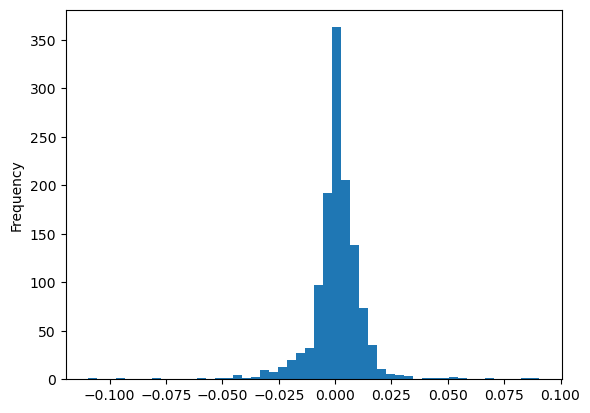

In [4]:
df['Return'].plot(kind='hist', bins=50)

In [5]:
print('Skewness=', round(df.Return.skew(),2))
print('Kurtosis=', round(df.Return.kurt(),2))

Skewness= -0.79
Kurtosis= 18.24


In [6]:
import scipy.stats as stats
print('Skewness test p-value:',round(stats.skewtest(df.Return).pvalue, 4))
print('Kurtosis test p-value:',round(stats.kurtosistest(df.Return).pvalue, 4))

Skewness test p-value: 0.0
Kurtosis test p-value: 0.0


In [7]:
sd = df.Return.std()
round(sd, 3)

0.012

In [8]:
df[df.Return > (sd*3)]

,AdjustedClose,Return
Date,,
2018-12-26,468.112,0.050525
2020-03-02,598.865,0.043308
2020-03-04,606.169,0.042034
2020-03-10,558.816,0.051744
2020-03-13,521.810,0.085487
2020-03-17,489.802,0.053993
2020-03-24,473.875,0.090601
2020-03-26,509.053,0.058390
2020-04-06,516.186,0.067166


In [9]:
df[df.Return < (-sd*3)]

,AdjustedClose,Return
Date,,
2018-02-05,492.508,-0.041823
2018-02-08,480.752,-0.037508
2020-02-27,576.428,-0.044912
2020-03-09,531.323,-0.078094
2020-03-11,531.575,-0.048748
2020-03-12,480.715,-0.095678
2020-03-16,464.711,-0.109425
2020-03-18,465.002,-0.050633
2020-03-20,445.909,-0.043093


In [10]:
outliers = df[(df.Return < (-3*sd)) | (df.Return > (3*sd))]

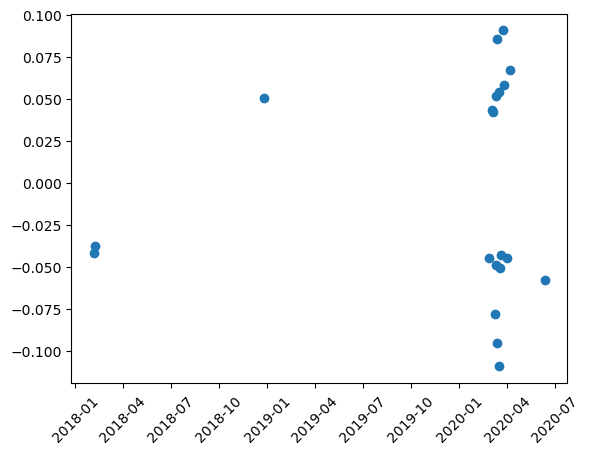

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=outliers.index, y=outliers.Return)
plt.xticks(rotation = 45)
plt.show()

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC